<a id='Top'></a>
<div style="text-align: center; color: #03001C; font-family: Courier New, monospace;">
    <span style="font-size: 35px;"><b>House Prices Advanced Regression Techniques</b></span>
</div>

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png">

<a href="#Bottom">
    <button style="background-color: #89375F; color: white; border: none; border-radius: 4px;">
        Move to Bottom
    </button>
</a>

<div style="text-align: center; color: #FF7B54; font-family: fantasy;">
    <span style="font-size: 30px;">Unmassenger Assignments : 7 & 8</span><hr><br>
   <div style="text-align: left; color: #03C988; font-family: Courier New, monospace;">
       <span style="font-size: 22px;"><b>Following tasks to be performed:</b></span>
   </div>
</div>
<div><br>
    <ul style="font-size: 16px; font-family: cursive; color: #243763">
        <li><b>Task 1: Data Understanding: </b>Begin by exploring the dataset and understanding its structure, including the meaning and type of each feature.</li><br>
        <li><b>Task 2: Data Cleaning: </b>Perform data cleaning tasks to handle missing values, outliers, and inconsistencies in the dataset.</li><br>
        <li><b>Task 3: Feature Engineering: </b>Perform feature engineering to enhance the predictive power of the dataset. This may include creating new features, transforming  existing features, or selecting relevant features.</li><br> 
        <li><b>Task 4: Data Preprocessing: </b>Prepare the cleaned dataset for model training. This involves scaling numerical features, encoding categorical variables, and splitting the data into training and testing sets.</li><br> 
        <li><b>Task 5: Model Training and Evaluation: </b>Choose an appropriate regression model (e.g., linear regression, random forest, or gradient boosting) and train it on the preprocessed dataset. Evaluate the model's performance using suitable metrics like mean squared error (MSE) or root mean squared error (RMSE).</li><br> 
        <li><b>Task 6: Model Optimization: </b>Fine-tune the hyperparameters of the chosen model to improve its performance. You can use techniques like cross-validation or grid search to find the best parameter values.</li><br> 
        <li><b>Task 7: Model Deployment: </b>Once you have a satisfactory model, deploy it to make predictions on new, unseen data. You can use the trained model to predict house prices for new instances and assess its real-world applicability.</li><br> 
        <li><b>Task 8: Linkedin Post: </b>Once you complete all the above tasks, make a linkedin post from your account for the
entire Final Assignment completion. </li><br> 
    </ul>
</div>
<hr>

<a id='Table'></a>
<div style="text-align: left; color: #B31312;">
    <span style="font-size: 22px;"><b><u>Table of contents</u></b></span>
</div><br>

- [Task 1: Data Understanding](#1)
   > - [Importing required libraries](#1.1)
   > - [Loading the data from csv file to pandas dataframe](#1.2)
   
- [Task 2: Data Preprocessing & Cleaning](#2)
   > - [Handling missing, duplicate and 0 values](#2.1)
   > - [Handling categorical features](#2.2)
   > - [Dealing with outliers](#2.3)
   
- [Task 3: Feature Engineering](#3)

   > - [Log Transformation on Target Variable](#3.1)
   > - [Encoding Independent Variables](#3.2)

- [Task 4: Data Preprocessing](#2)
<br>
- [Task 5: Model Training and Evaluation](#5)
   > - [Splitting the Data and Target](#5.1)
   > - [Feature Scaling](#5.2)
   > - [Model Training](#5.3)
   > - [Evaluation Metrics](#5.4)
   
- [Task 6: Model Optimization](#6)
   > - [Cross Validaion](#6.1)
   > - [Evaluating the Algorithms](#6.2)
   
- [Task 7: Model Deployment Steps](#7)
   > - [Creating Pickle File](#7.1)
<hr>

<a id='1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 1: Data Understanding</b></span>
</div><br>
<a id='1.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Importing required libraries</b></span>
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
 
from scipy import stats
from scipy.stats import norm, skew

In [2]:
import warnings
warnings.simplefilter("ignore")

<a id='1.2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>B. Loading the data from csv file to pandas dataframe</b></span>
</div>

In [3]:
df = pd.read_csv('data.csv')

In [4]:
## Inspecting the first 5 rows of the dataframe
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [5]:
## Shape of dataframe
df.shape

(4600, 18)

In [6]:
## Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
## Lets see the discription of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


<a id='2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 2: Data Preprocessing & Cleaning</b></span>
</div>

In [8]:
## ## Converting dtypes of columns
df['date'] = pd.to_datetime(df['date'])
df['price']     = df['price'].astype('int64')
df['bedrooms']  = df['bedrooms'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors']    = df['floors'].astype('int64')
df['street']    = df['street'].astype('string')
df['city']      = df['city'].astype('string')
df['statezip']  = df['statezip'].astype('string')
df['country']   = df['country'].astype('string')

<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>Creating age and renovation columns</b></span>
</div>

In [9]:
# Extract features from the datetime column
df.insert(1, "year", df.date.dt.year)
df.head(3)

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


<a id='2.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Handling missing, duplicate and 0 values</b></span>
</div>

In [10]:
## Check for missing or null values
df.isnull().sum()

date             0
year             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 16px;"><b>There are no missing values in the dataset, but there are 0(zero) value in some columns which will impact the whole model.</b></span>
</div>

In [11]:
## Removing duplicate rows from the dataframe if there are in the data
df.drop_duplicates()
df.shape

(4600, 19)

<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 16px;"><b>There are no duplicate values in the dataframe.</b></span>
</div>

In [12]:
## Removing rows having price values 0

# Checking price having 0 values
price_zero = (df.price == 0).sum()
print(price_zero)

# drop the column having price value 0
df['price'].replace(0, np.nan, inplace = True)
df.dropna(inplace=True)

# Checking shape of the dataset
print(df.shape)

49
(4551, 19)


In [13]:
## Dropping unnecessary columns from the dataset
df = df.drop(['date', 'street'], axis = 1)
df.head(3)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,WA 98042,USA


In [14]:
## Number of unique value counts in the dataset
df.nunique(axis = 0)

year                1
price            1740
bedrooms           10
bathrooms           8
sqft_living       561
sqft_lot         3087
floors              3
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
city               44
statezip           77
country             1
dtype: int64

<a id='2.2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>B. Handling categorical features</b></span>
</div>

In [15]:
## Checking dtype of the dataset
df.dtypes

year               int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              string
statezip          string
country           string
dtype: object

In [16]:
## Treating 'statezip' column and extracting the numeric code only
df['statezip'] = df['statezip'].str.split().str[1]

# Reshape the column to a 2D array with a single feature
df['statezip'] = np.reshape(df['statezip'].values, (-1, 1))

In [17]:
## Converting dtypes of columns
#df['price']     = df['price'].astype('int64')
df['statezip'] = df['statezip'].astype('int64')
df['floors']    = df['floors'].astype('int64')

In [18]:
## Checking dtype of the dataset again
df.dtypes

year               int64
price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              string
statezip           int64
country           string
dtype: object

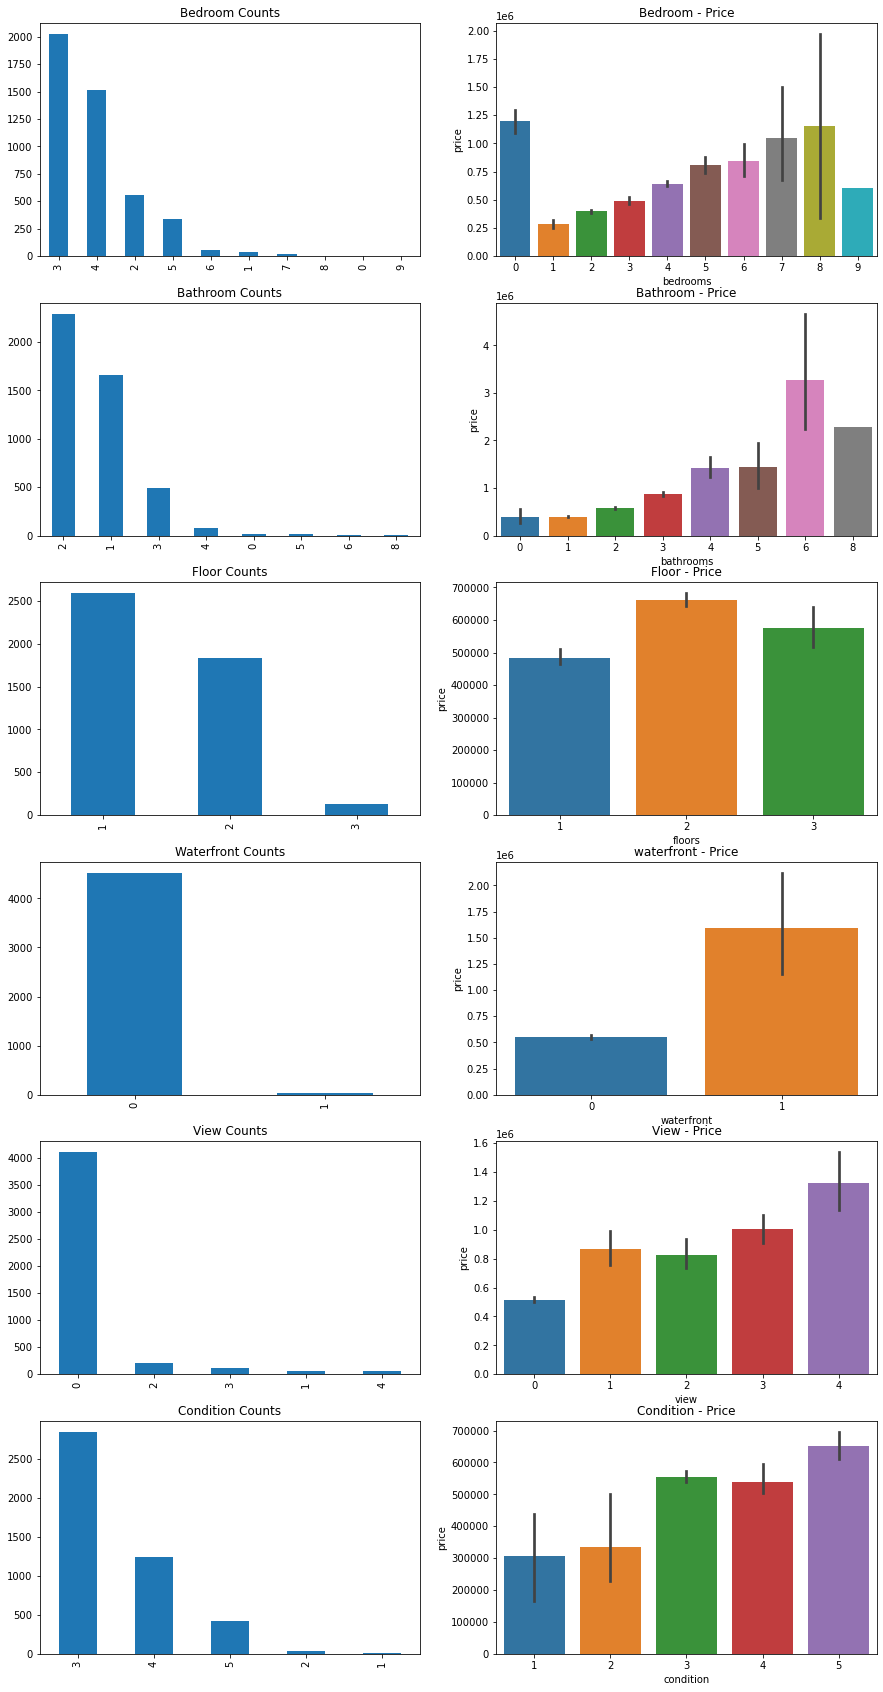

In [19]:
## Univariate & Bivariant analysis of categorical columns
plt.figure(figsize=(15, 30))

plt.subplot(6, 2, 1)
pd.value_counts(df['bedrooms']).plot(kind='bar')
plt.title("Bedroom Counts")

plt.subplot(6, 2, 2)
sns.barplot(x = df['bedrooms'], y = df.price)
plt.title("Bedroom - Price")

plt.subplot(6, 2, 3)
pd.value_counts(df['bathrooms']).plot(kind='bar')
plt.title("Bathroom Counts")

plt.subplot(6, 2, 4)
sns.barplot(x = df['bathrooms'], y = df.price)
plt.title("Bathroom - Price")

plt.subplot(6, 2, 5)
pd.value_counts(df['floors']).plot(kind='bar')
plt.title("Floor Counts")

plt.subplot(6, 2, 6)
sns.barplot(x = df['floors'], y = df.price)
plt.title("Floor - Price")

plt.subplot(6, 2, 7)
pd.value_counts(df['waterfront']).plot(kind='bar')
plt.title("Waterfront Counts")

plt.subplot(6, 2, 8)
sns.barplot(x = df['waterfront'], y = df.price)
plt.title("waterfront - Price")

plt.subplot(6, 2, 9)
pd.value_counts(df['view']).plot(kind='bar')
plt.title("View Counts")

plt.subplot(6, 2, 10)
sns.barplot(x = df['view'], y = df.price)
plt.title("View - Price")

plt.subplot(6, 2, 11)
pd.value_counts(df['condition']).plot(kind='bar')
plt.title("Condition Counts")

plt.subplot(6, 2, 12)
sns.barplot(x = df['condition'], y = df.price)
plt.title("Condition - Price")

plt.show()

<a id='2.3'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>C. Dealing with outliers</b></span>
</div>

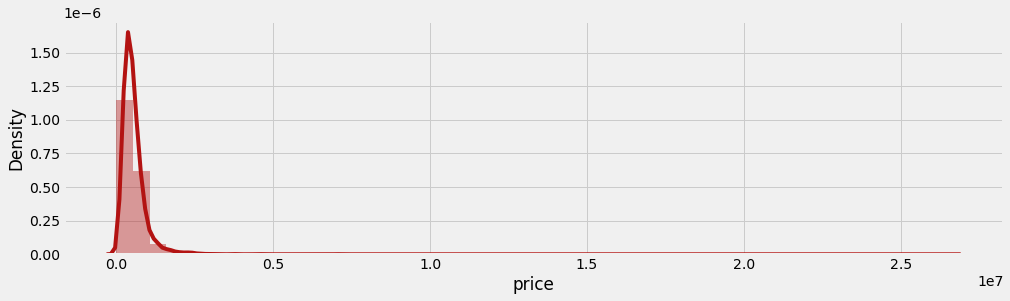

In [20]:
## Checking distribution of price
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,4)

sns.distplot(df['price'],color="#B31312",kde=True)
plt.show()

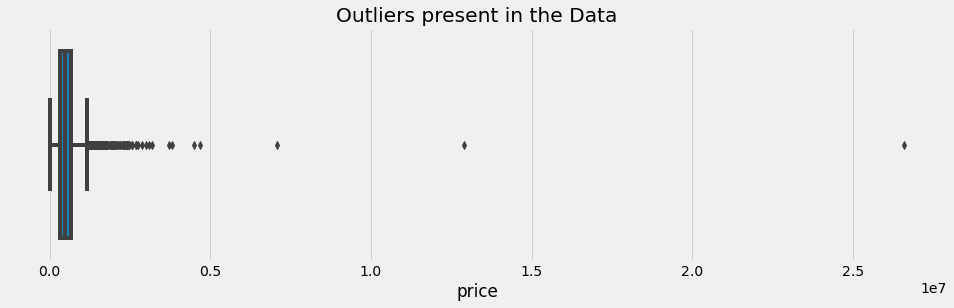

In [21]:
## Lets visualize the outliers using box-plot
sns.boxplot(df['price'])
plt.title('Outliers present in the Data')
plt.show()

In [22]:
## Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

## Calculate the interquartile range (IQR)
IQR = Q3 - Q1

## Define the lower and upper bounds for outlier detection
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

## Find the outliers in the column
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

## Count the number of outliers
outlier_count = len(outliers)

## Print the number of outliers
print("Number of outliers in 'price' column :",outlier_count)
outliers.head()

Number of outliers in 'price' column : 240


,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119,USA
11,2014,1400000.0,4,2,2920,4000,1,0,0,5,1910,1010,1909,1988,Seattle,98105,USA
14,2014,1200000.0,5,2,2910,9480,1,0,0,3,2910,0,1939,1969,Seattle,98105,USA
99,2014,1395000.0,5,3,4010,8510,2,0,1,5,2850,1160,1971,0,Seattle,98105,USA
122,2014,2280000.0,7,8,13540,307752,3,0,4,3,9410,4130,1999,0,Redmond,98053,USA


In [23]:
# Convert the outliers to NaN
df['price'][outliers.index] = np.nan
df.head(3)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,98133,USA
1,2014,NaN,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119,USA
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,98042,USA


In [24]:
## Lets check again the total number of missing values in the 'price' column
df['price'].isnull().sum()

240

In [25]:
## Fill the NaN values with the mean

# Calculate the mean value (rounded to 0 decimal places)
mean_value = round(df['price'].mean())

# Fill null values with the rounded mean value
df['price'].fillna(mean_value, inplace=True)
#df['price'] = df['price'].fillna(df['price'].mean())
df.head(3)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,98133,USA
1,2014,487457.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,98119,USA
2,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,98042,USA


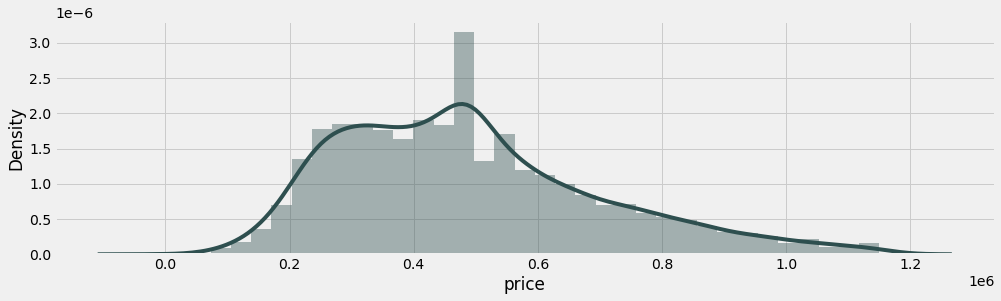

In [26]:
## Again checking distribution of price
sns.distplot(df['price'],color="#2E4F4F",kde=True)
plt.show()

<a id='3'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 3: Feature Engineering</b></span>
</div>

<a id='3.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Log Transformation on Target Variable</b></span>
</div>

<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 16px;"><b>With the help of Q-Q plot we see whether the target variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.</b></span>
</div>

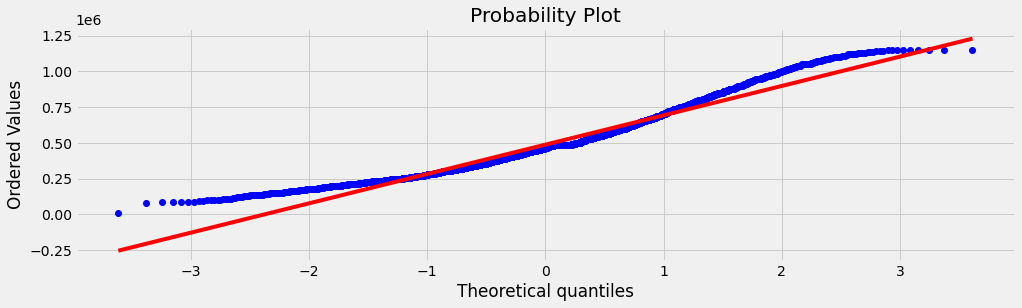

In [27]:
## Plotting QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 16px;"><b>As the target variable (price) is very skewed, so we apply log-transformation on target varibale to make it Normally Distributed.</b></span>
</div>

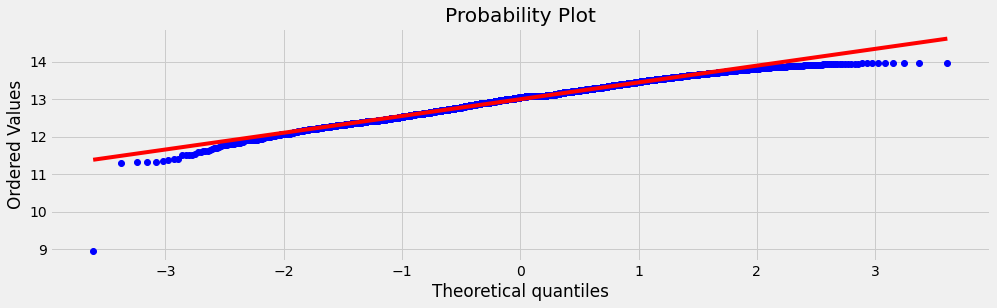

In [28]:
## Applying log-transformation
df['price'] = np.log(df['price'])

## Again plotting QQ-plot
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)
plt.show()

<AxesSubplot:xlabel='price', ylabel='Density'>

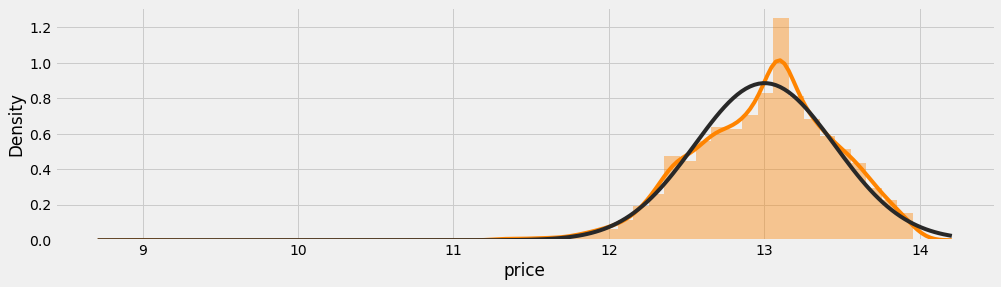

In [29]:
## Checking distribution of price again
sns.distplot(df['price'],color="#FF8400",kde=True,fit=norm)

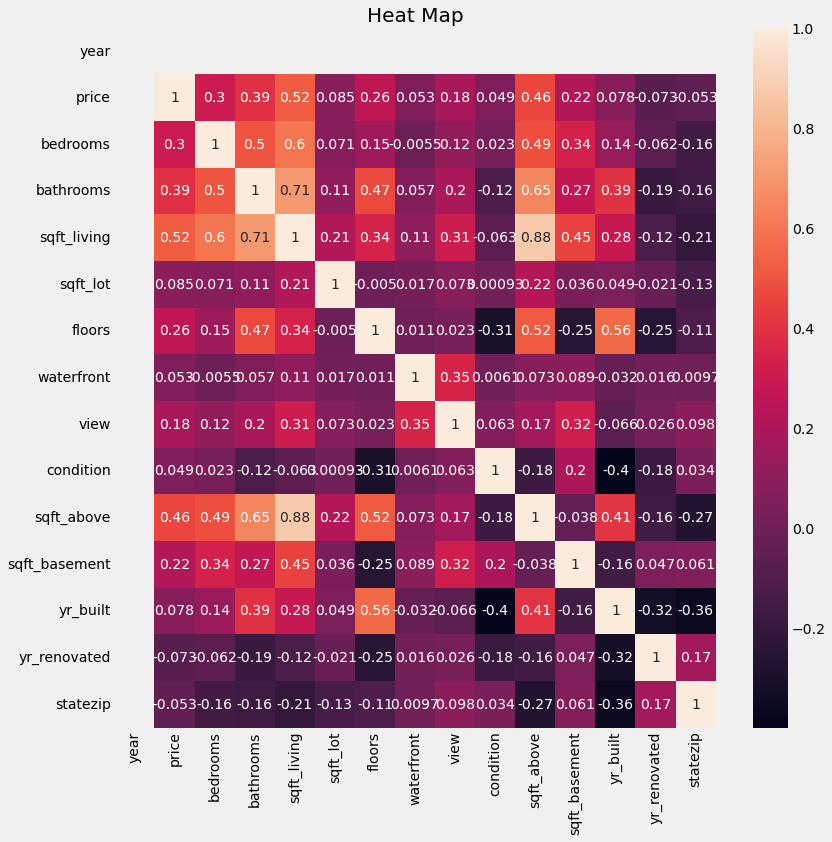

In [30]:
## Creating heatmap to check the correlation in the dataset
plt.rcParams['figure.figsize'] = (12,12)

sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

<a id='3.2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>B. Encoding Independent Variables</b></span>
</div>

In [31]:
## Applying encoding on columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'city' column
df['city'] = label_encoder.fit_transform(df['city'])
df['country'] = label_encoder.fit_transform(df['country'])
df['bedrooms'] = label_encoder.fit_transform(df['bedrooms'])
df['bathrooms'] = label_encoder.fit_transform(df['bathrooms'])
df['price'] = label_encoder.fit_transform(df['price'])
df['sqft_living'] = label_encoder.fit_transform(df['sqft_living'])
df['sqft_lot'] = label_encoder.fit_transform(df['sqft_lot'])
df['sqft_above'] = label_encoder.fit_transform(df['sqft_above'])
df['sqft_basement'] = label_encoder.fit_transform(df['sqft_basement'])
df['yr_built'] = label_encoder.fit_transform(df['yr_built'])
df['yr_renovated'] = label_encoder.fit_transform(df['yr_renovated'])

In [32]:
df.columns

Index(['year', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip',
       'country'],
      dtype='object')

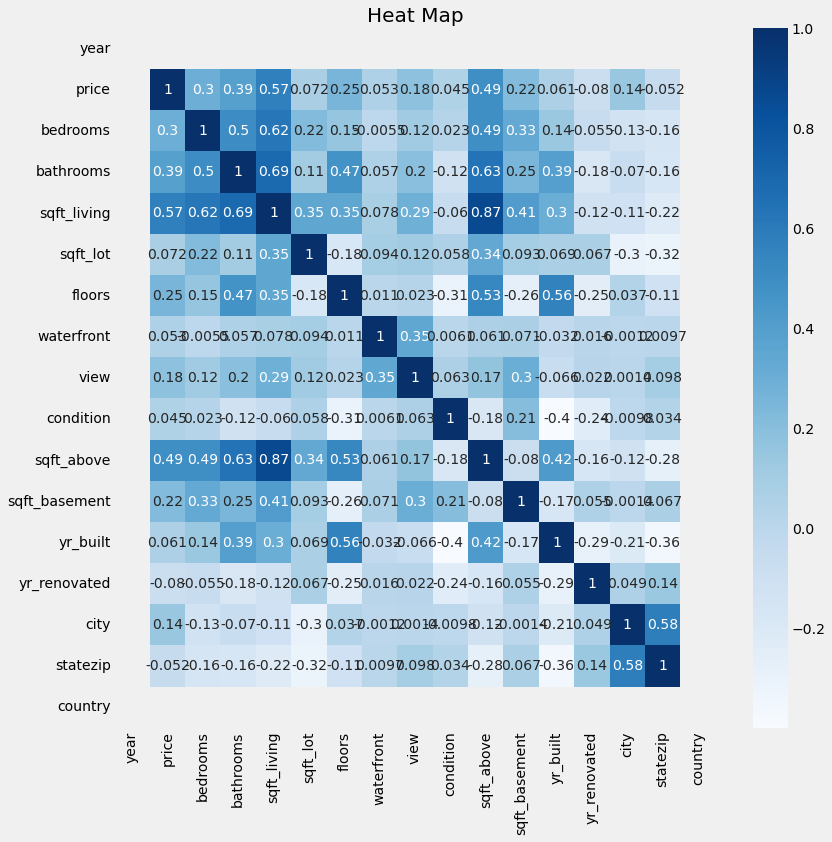

In [33]:
## Creating heatmap to check the correlation in the dataset
plt.rcParams['figure.figsize'] = (12,12)
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

In [34]:
df.columns

Index(['year', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'city', 'statezip',
       'country'],
      dtype='object')

In [35]:
data= df.copy()
data.head(3)

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014,401,3,1,93,1391,1,0,0,3,96,0,55,49,36,98133,0
1,2014,866,5,2,406,1691,2,0,4,5,373,29,21,0,35,98119,0
2,2014,486,3,2,180,2185,1,0,0,4,182,0,66,0,18,98042,0


In [36]:
data.dtypes

year             int64
price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
city             int32
statezip         int64
country          int32
dtype: object

<a id='5'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 5: Model Training and Evaluation</b></span>
</div>

<a id='5.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Splitting the Data and Target</b></span>
</div>

In [37]:
## Creating dependent and independent sets
X = data.drop(['price',], axis = 1)
Y = data['price']

print(X.head())
print(Y.head())

   year  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  2014         3          1           93      1391       1           0     0   
1  2014         5          2          406      1691       2           0     4   
2  2014         3          2          180      2185       1           0     0   
3  2014         3          2          191      1431       1           0     0   
4  2014         4          2          181      2016       1           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  city  \
0          3          96              0        55            49    36   
1          5         373             29        21             0    35   
2          4         182              0        66             0    18   
3          4          52            109        63             0     3   
4          4          70             85        76            36    31   

   statezip  country  
0     98133        0  
1     98119        0  
2    

In [38]:
## Perform train test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3185, 16)
(3185,)
(1366, 16)
(1366,)


<a id='5.2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>B. Feature Scaling</b></span>
</div>

In [39]:
## Perform standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='5.3'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>C. Model Training</b></span>
</div>

In [41]:
### Creating Models using diffenet algorithms

## 1. Creating a  Linear Regression Model
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, Y_train)
Y_pred1 = LR.predict(X_test)

## 2. Creating a Random Forest Model
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
Y_pred2 = RF.predict(X_test)

## 3. Creating a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)
Y_pred3 = GB.predict(X_test)

## 4. Creating a SVR Model
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, Y_train)
Y_pred4 = svr.predict(X_test)

## 5. Creating a Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
Y_pred5 = DT.predict(X_test)

## 6. Creating Ridge Model
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)
Y_pred6 = ridge.predict(X_test)

## 7. Creating ElasticNet Model
from xgboost import XGBRegressor 

xGB = XGBRegressor()
xGB.fit(X_train, Y_train)
Y_pred7 = xGB.predict(X_test)

<a id='5.4'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>D. Evaluation Metrics</b></span>
</div>

- **R2 Score**
- **Root Mean Squared Error (RMSE)**
- **Mean Squared Error (MSE)**

In [42]:
## Checking Model accuracy
from sklearn.metrics import r2_score, mean_squared_error

r2_score1 = r2_score(Y_test, Y_pred1)
r2_score2 = r2_score(Y_test, Y_pred2)
r2_score3 = r2_score(Y_test, Y_pred3)
r2_score4 = r2_score(Y_test, Y_pred4)
r2_score5 = r2_score(Y_test, Y_pred5)
r2_score6 = r2_score(Y_test, Y_pred6)
r2_score7 = r2_score(Y_test, Y_pred7)
mse1 = mean_squared_error(Y_test, Y_pred1)
mse2 = mean_squared_error(Y_test, Y_pred2)
mse3 = mean_squared_error(Y_test, Y_pred3)
mse4 = mean_squared_error(Y_test, Y_pred4)
mse5 = mean_squared_error(Y_test, Y_pred5)
mse6 = mean_squared_error(Y_test, Y_pred6)
mse7 = mean_squared_error(Y_test, Y_pred7)
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)
rmse3 = np.sqrt(mse3)
rmse4 = np.sqrt(mse4)
rmse5 = np.sqrt(mse5)
rmse6 = np.sqrt(mse6)
rmse7 = np.sqrt(mse7)

print("Linear Regression R2 Score :", r2_score1)
print("Linear Regression MSE :", mse1)
print("Linear Regression RMSE :", rmse1)
print("Random Forest R2 Score :", r2_score2)
print("Random Forest MSE :", mse2)
print("Random Forest RMSE :", rmse2)
print("Gradient Boosting R2 Score :", r2_score3)
print("Gradient Boosting MSE :", mse3)
print("Gradient Boosting RMSE :", rmse3)
print("SVR R2 Score :", r2_score4)
print("SVR MSE :", mse4)
print("SVR RMSE :", rmse4)
print("Decision Tree R2 Score :", r2_score5)
print("Decision Tree MSE :", mse5)
print("Decision Tree RMSE :", rmse5)
print("Ridge R2 Score :", r2_score6)
print("Ridge MSE :", mse6)
print("Ridge RMSE :", rmse6)
print("XGBRegressor R2 Score :", r2_score7)
print("XGBRegressor MSE :", mse7)
print("XGBRegressor RMSE :", rmse7)

Linear Regression R2 Score : 0.397686659131536
Linear Regression MSE : 103209.33772491771
Linear Regression RMSE : 321.2621012894576
Random Forest R2 Score : 0.6903594632111518
Random Forest MSE : 53058.42086892132
Random Forest RMSE : 230.3441357380763
Gradient Boosting R2 Score : 0.6561192998010581
Gradient Boosting MSE : 58925.640386346044
Gradient Boosting RMSE : 242.74604092826323
SVR R2 Score : 0.18990620911405076
SVR MSE : 138813.53438370177
SVR RMSE : 372.5768838558047
Decision Tree R2 Score : 0.4420918608285038
Decision Tree MSE : 95600.28916544656
Decision Tree RMSE : 309.192964288398
Ridge R2 Score : 0.39770956431349247
Ridge MSE : 103205.4128099278
Ridge RMSE : 321.2559926443829
XGBRegressor R2 Score : 0.7302971717417563
XGBRegressor MSE : 46214.899120339214
XGBRegressor RMSE : 214.97650829878881


In [43]:
## Checking scores of the models
print(LR.score(X_test,Y_test),": Linear Regression")
print(RF.score(X_test,Y_test),": Random Forest")
print(GB.score(X_test,Y_test),": Gradient Boosting")
print(svr.score(X_test,Y_test),": SVR")
print(DT.score(X_test,Y_test),": Decision Tree")
print(ridge.score(X_test,Y_test),": Ridge")
print(xGB.score(X_test,Y_test),": XGBRegressor")

0.397686659131536 : Linear Regression
0.6903594632111518 : Random Forest
0.6561192998010581 : Gradient Boosting
0.18990620911405076 : SVR
0.4420918608285038 : Decision Tree
0.39770956431349247 : Ridge
0.7302971717417563 : XGBRegressor


<a id='6'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 6: Model Optimization</b></span>
</div>

<a id='6.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Cross Validaion</b></span>
</div>

In [44]:
# Calculate the train and test scores of XGBRegressor model
train_score = xGB.score(X_train, Y_train)
test_score = xGB.score(X_test, Y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.9720086237936045
Test Score: 0.7302971717417563


In [45]:
## Performing cross validaion
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xGB, X, Y, cv=10)
print(scores)
print("Mean of all scores: ",scores.mean())

[0.72153761 0.80203433 0.69453533 0.76635448 0.76542264 0.7558713
 0.78215596 0.75477166 0.75603761 0.54437515]
Mean of all scores:  0.7343096060986877


<a id='6.2'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>B. Evaluating the Algorithms</b></span>
</div>

In [46]:
## Creating dataframe for Models with scores
final_data = pd.DataFrame({'Models':['Linear Regression', 'Random Forest Regressor', 
                'Gradient Boosting Regressor', 'SVR', 'DecisionTreeRegressor', 'ElasticNet', 'XGBRegressor'], 
                        'R2_Score': [r2_score1, r2_score2, r2_score3, r2_score4, r2_score5, r2_score6, r2_score7]})

models_df = pd.DataFrame(final_data)

# Sort the DataFrame based on R2_Score in descending order
models_df_sorted = models_df.sort_values(by='R2_Score', ascending=False)

# Apply background gradient to the R2_Score column
models_df_sorted_styled = models_df_sorted.style.background_gradient(subset=['R2_Score'], cmap='Blues')
models_df_sorted_styled

,Models,R2_Score
6,XGBRegressor,0.730297
1,Random Forest Regressor,0.690359
2,Gradient Boosting Regressor,0.656119
4,DecisionTreeRegressor,0.442092
5,ElasticNet,0.397710
0,Linear Regression,0.397687
3,SVR,0.189906


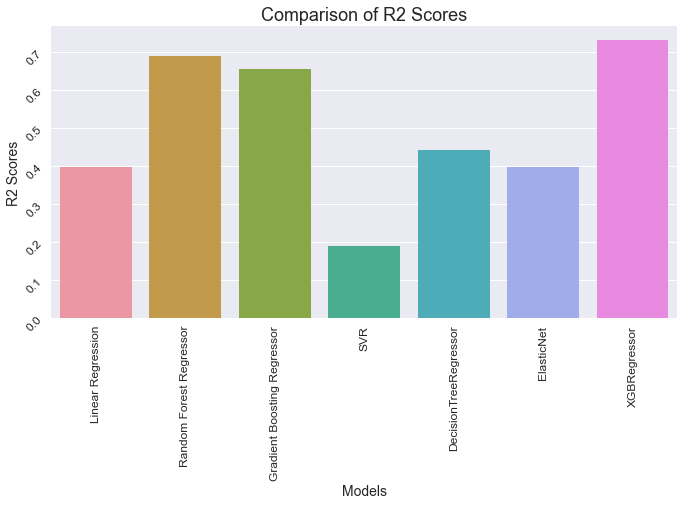

In [47]:
## Visualize the scores on barplot
plt.style.use('seaborn')
plt.figure(figsize = (10, 5))
sns.barplot(final_data['Models'],final_data['R2_Score'])

# Set the axis labels and title
plt.xlabel('Models', fontsize= 14)
plt.ylabel('R2 Scores', fontsize= 14)
plt.title('Comparison of R2 Scores', fontsize = 18)
plt.xticks(fontsize= 12, rotation = 90)
plt.yticks(fontsize= 12, rotation = 45)
plt.show()

<a id='7'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 20px;"><b>Task 7: Model Deployment Steps</b></span>
</div>

<a id='7.1'></a>
<div style="color: black; font-family: Courier New, monospace;">
    <span style="font-size: 18px;"><b>A. Creating Pickle File</b></span>
</div>

In [ ]:
import pickle 
pickle.dump(RF,open("model_rf.pkl", 'wb'))

#### Save processed data as a CSV file
data.to_csv('processed_data.csv', index=False)

<a id='Bottom'></a>
<a href="#Top">
    <button style="padding: 8px 15px; background-color: #3C486B; color: white; border: none; border-radius: 4px;">
        Back to Top
    </button>
</a>
<a href="#Table">
    <button style="padding: 8px 15px; background-color: #3C486B; color: white; border: none; border-radius: 4px;">
        Table of contents
    </button>
</a>